### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import math
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import visuals_py as vs
from mpl_toolkits.mplot3d import axes3d

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

%matplotlib inline

# Setting Random Seed
np.random.seed(42)
np.random.RandomState(42)

import warnings
warnings.filterwarnings("ignore")

### Loading Data: 

In [3]:
data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")

# displaying first 5 rows
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### Analyzing the Data:

In [4]:
print("Number of data points :", len(data))

Number of data points : 569


In [5]:
data.shape

(569, 33)

In [6]:
# Describe data
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [7]:
# printing columns
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# checking for null values
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Preparing Data

In [64]:
# Saving the target variable in y
y = data["diagnosis"]

### Selecting Features
* The patient's "id" column and the target variable-"diagnosis" column are not required in our to be trained data.
* The "Unnammed: 32" column has 569 i.e all NaN values.

In [63]:
# Dropping the above mentioned columns
X = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

### Looking for correlation between variables:

<AxesSubplot:>

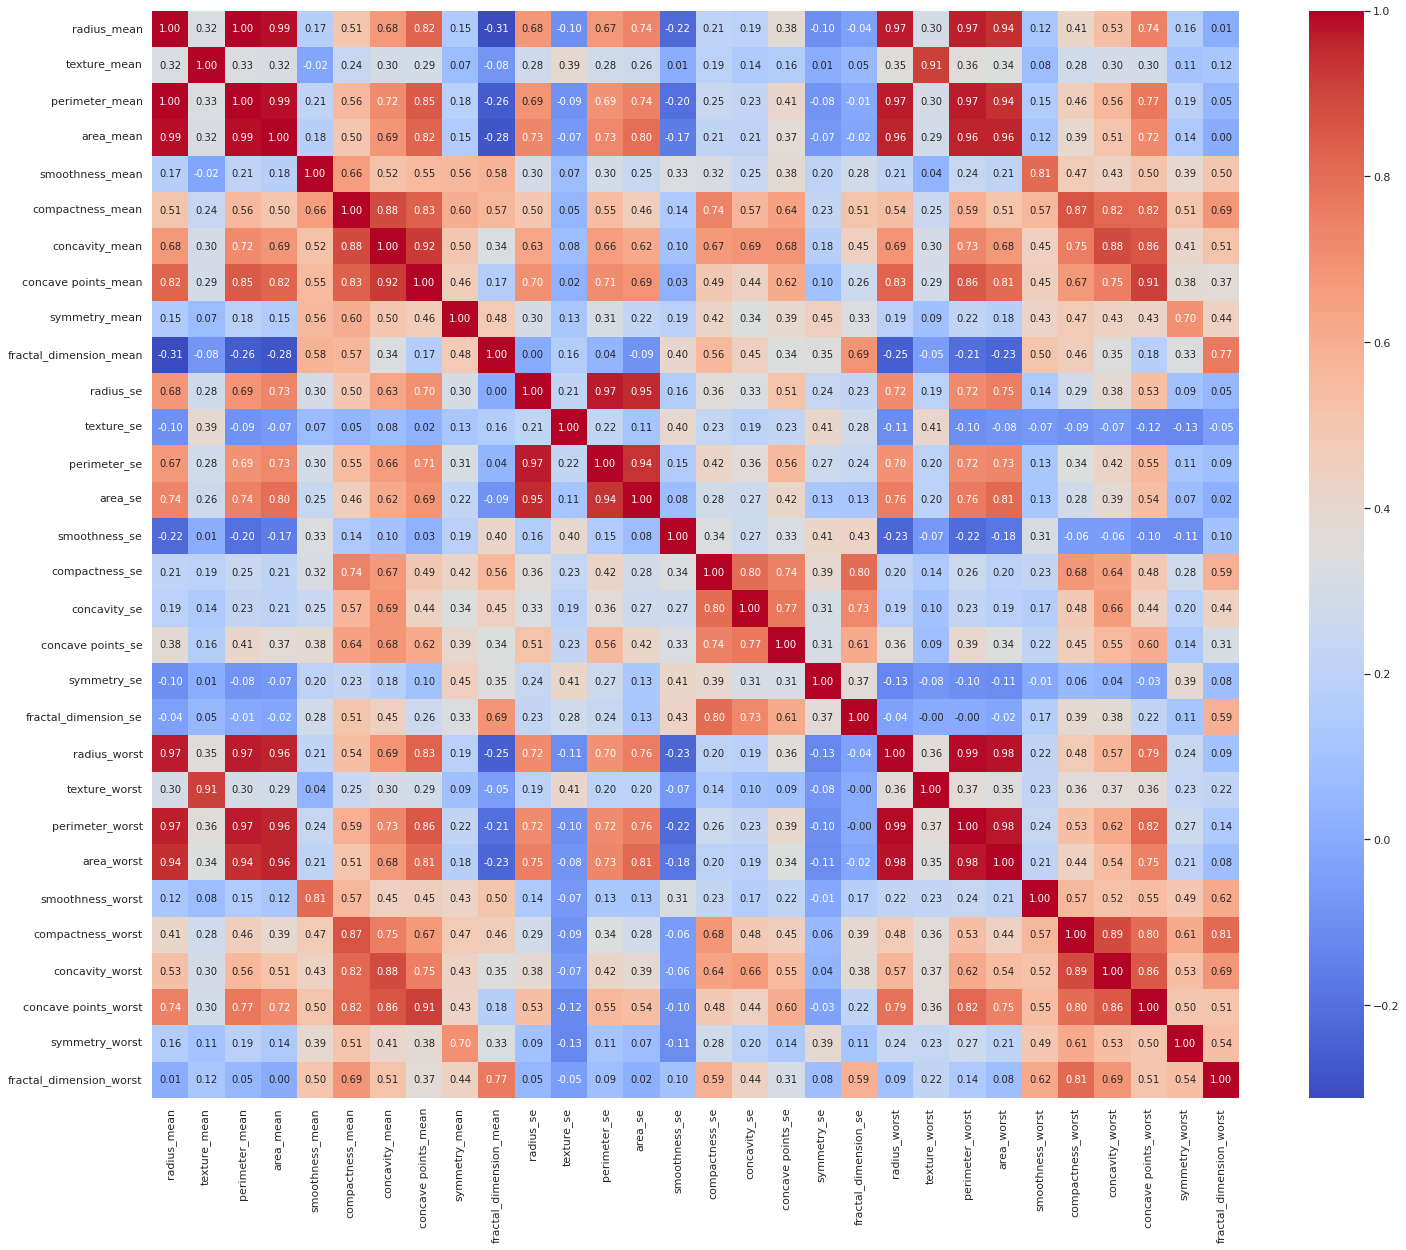

In [12]:
# Plotting a Correlation heatmap
corr = X.corr() # .corr is used for find corelation
#plt.figure(figsize=(20,15))
sns.set(rc={'figure.figsize':(25,20)})
# plot a heatmap
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= X.columns, yticklabels= X.columns,
           cmap= 'coolwarm') 

#### **Observations:**
**There are some stronge correlations -**
* Features like ***(something)_mean***, ***(something)_se*** and ***(something)_worst***, have a natural correlation as all these features have been generated using the same data, for example: to generate radius_mean, radius_se and radius_worst, the radius measurements have been used.
* ***Radius, Perimeter*** and ***Area*** seems to have a strong <u>***positive***</u> correlation.
* ***Radius*** seems to have a strong <u>***positive***</u> correlation with ***Concave Points***.
* ***Compacteness***, ***Concavity*** and ***Concave Points*** seems to have a strong <u>***positive***</u> correlation.
* ***Fractal Dimension*** seems to have some <u>***negative***</u> correlation with ***Radius, Perimeter*** and ***Area***.

### Verifying the above observations:
#### **Positive Correlations:**

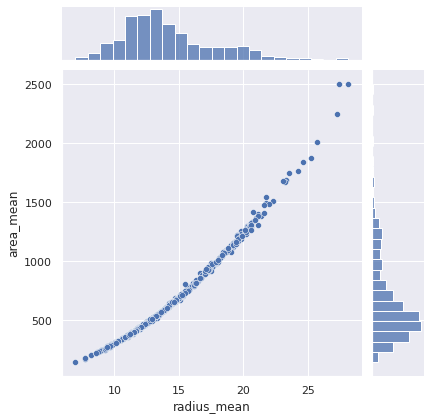

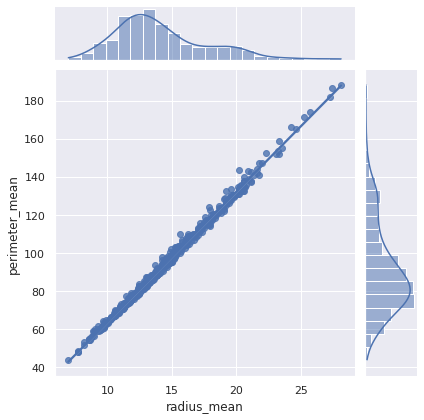

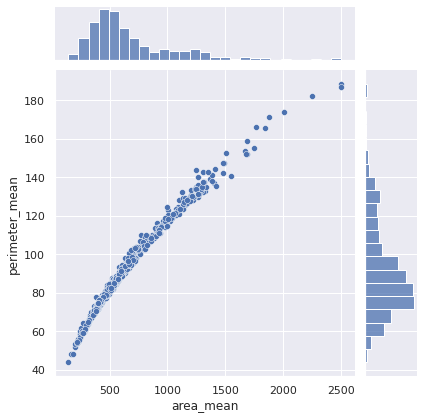

In [13]:
# Plotting relationship between pairs of variables-"radius_mean", "area_mean" and "perimeter_mean"
sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'area_mean'], 
              kind="scatter")

sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="reg")

sns.jointplot(X.loc[:,'area_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="scatter")

# A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) 
#varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the 
#distribution of the independent variable(X). The third plot is placed on the right margin of the bivariate graph with the orientation 
#set to vertical and it shows the distribution of the dependent variable(Y). It is very helpful to have univariate and bivariate plots 
#together in one figure. This is because the univariate analysis focuses on one variable, it describes, summarizes and shows any patterns 
#in your data and the bivariate analysis explores the relationship between two variables and also describes the strength of their relationship. 

**Hence verified, Radius, Perimeter and Area have a strong positive correlation.**

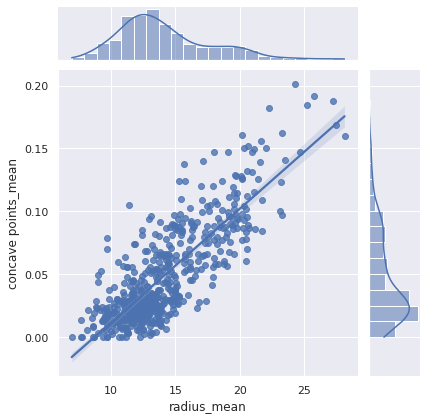

In [14]:
# Plotting relationship between variables-"radius_mean" and "concave points_mean"
sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="reg")

**Hence verified that Radius has a strong positive correlation with Concave Points.**

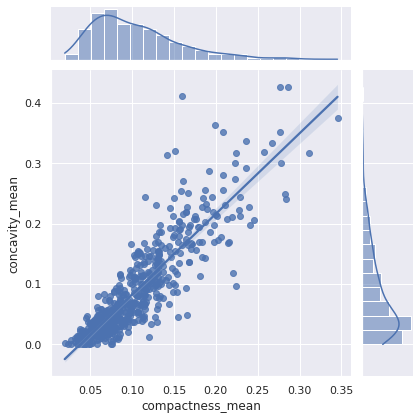

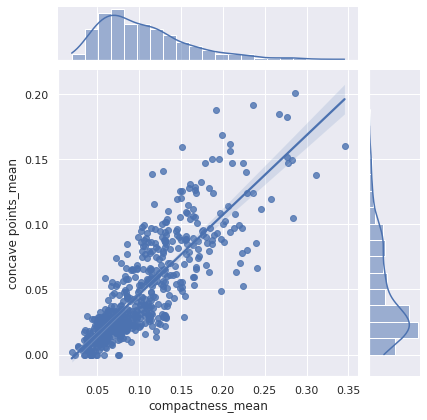

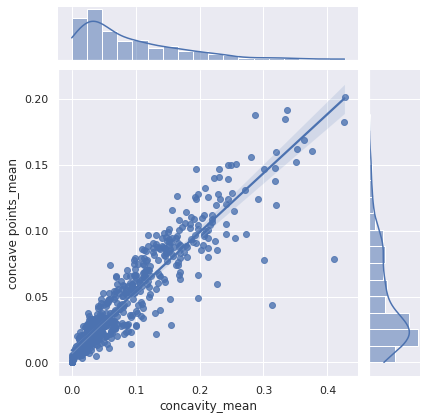

In [15]:
# Plotting relationship between pairs of variables-"compactness_mean", "concavity_mean" and "concave points_mean"
sns.jointplot(X.loc[:,'compactness_mean'], 
              X.loc[:,'concavity_mean'], 
              kind="reg")

sns.jointplot(X.loc[:,'compactness_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="reg")


sns.jointplot(X.loc[:,'concavity_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="reg")

**Hence verified that Compacteness, Concavity and Concave Points have a strong positive correlation.**
<br>
<br>
#### **Negative Correlations:**

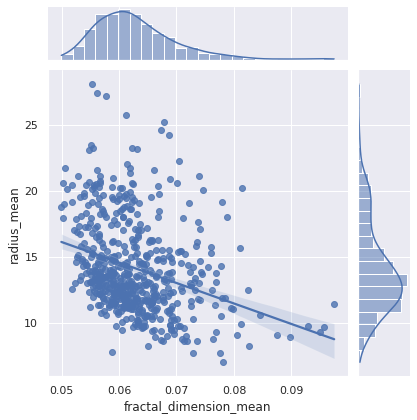

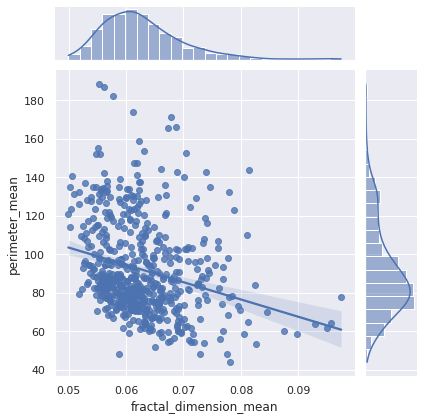

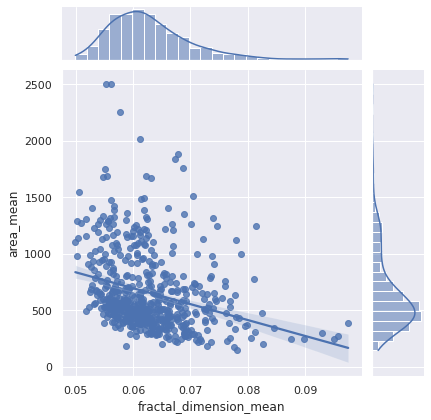

In [16]:
# Plotting relationship between ariables-"fractal_dimension_mean" and "radius_mean", "area_mean" and "perimeter_mean"
sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'radius_mean'], 
              kind="reg")

sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="reg")

sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'area_mean'], 
              kind="reg")

**Hence verified that Fractal Dimention has some negative correlation with Radius, Perimeter and Area.**

### Verifying if the Dataset is Balanced:

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

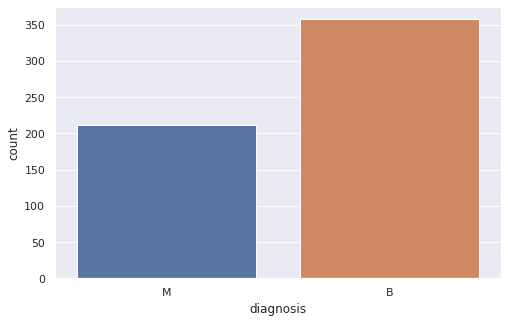

In [17]:
# Plotting a countplot
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(y) 

In [18]:
# Printing label counts
count = y.value_counts()
print('Number of Benign : ',count[0]) 
print('Number of Malignant : ',count[1]) 

Number of Benign :  357
Number of Malignant :  212


**The data seems to be unbalanced since there are more case of benign(B) tumors than malignant(M).** 
<br>Later we'll try using methods to balance the data and analyze if we could get better results.

### Feature Engineering:
**Creating a Volume Mean Feature - "mean_volume" using "radius_mean"**

In [19]:
# Creating an empty list
mean_volume = []
# defining pi
pi = 3.1415

# calculatin mean volume for each mean radius and saving the result in mean_volume list
for i in range(len(X)):
    #saving result in mean_volume list
    mean_volume.append((math.pow(X["radius_mean"][i], 3)*4*pi)/3)

# Creating a new feature
X2=
X["mean_volume"]= mean_volume  

**Creating a simple new feature - "measurements_sum_mean" by just adding up the features related to the cell size.**

In [20]:
# Creating a new feature by adding up some physical measurements
X["mesurements_sum_mean"] = X["radius_mean"] + X["perimeter_mean"] + X["area_mean"]

In [21]:
# Verifying the changes made to the data X 
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0                 0.07871  ...           184.60      2019.0            0.1622   
1                 0.05667  ...           158.80      1956.0            0.1238   
2                 0.05999  ...           152.50      1709.0            0.1444   
3                 0.09744  ...            98.87       567.7            0.2098   
4                 0.05883  ...           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst   mean_volume  mesurements_sum_mean  
0                  0.11890  24387.612775               1141.79  
1                  0.08902  36456.810913               1479.47  
2                  0.08758  31975.176401               1352.69  
3                  0.17300   6238.412850                475.10  
4                  0.07678  34988.227503               1452.39  

[5 rows x 32 columns]

### Feature Scaling:
Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.

In [10]:
# Defining a scaler function
def scaler(df):
    """The Function receives a Dataframe and returns a Scaled Dataframe"""
    scaler = preprocessing.MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    return scaled_df

# testing scaler
scaled_df = scaler(X)

scaled_df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.605518  ...      0.620776       0.141525         0.668310   
1                0.141323  ...      0.606901       0.303571         0.539818   
2                0.211247  ...      0.556386       0.360075         0.508442   
3                1.000000  ...      0.248310       0.385928         0.241347   
4                0.186816  ...      0.519744       0.123934         0.506948   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    0.450698          0.601136           0.619292         0.568610   
1    0.435214          0.347553           0.154563         0.192971   
2    0.374508          0.483590           0.385375         0.359744   
3    0.094008          0.915472           0.814012         0.548642   
4    0.341575          0.437364           0.172415         0.319489   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              0.912027        0.598462                 0.418864  
1              0.639175        0.233590                 0.222878  
2              0.835052        0.403706                 0.213433  
3              0.884880        1.000000                 0.773711  
4              0.558419        0.157500                 0.142595  

[5 rows x 30 columns]

### Feature Distribution:

<AxesSubplot:xlabel='value', ylabel='features'>

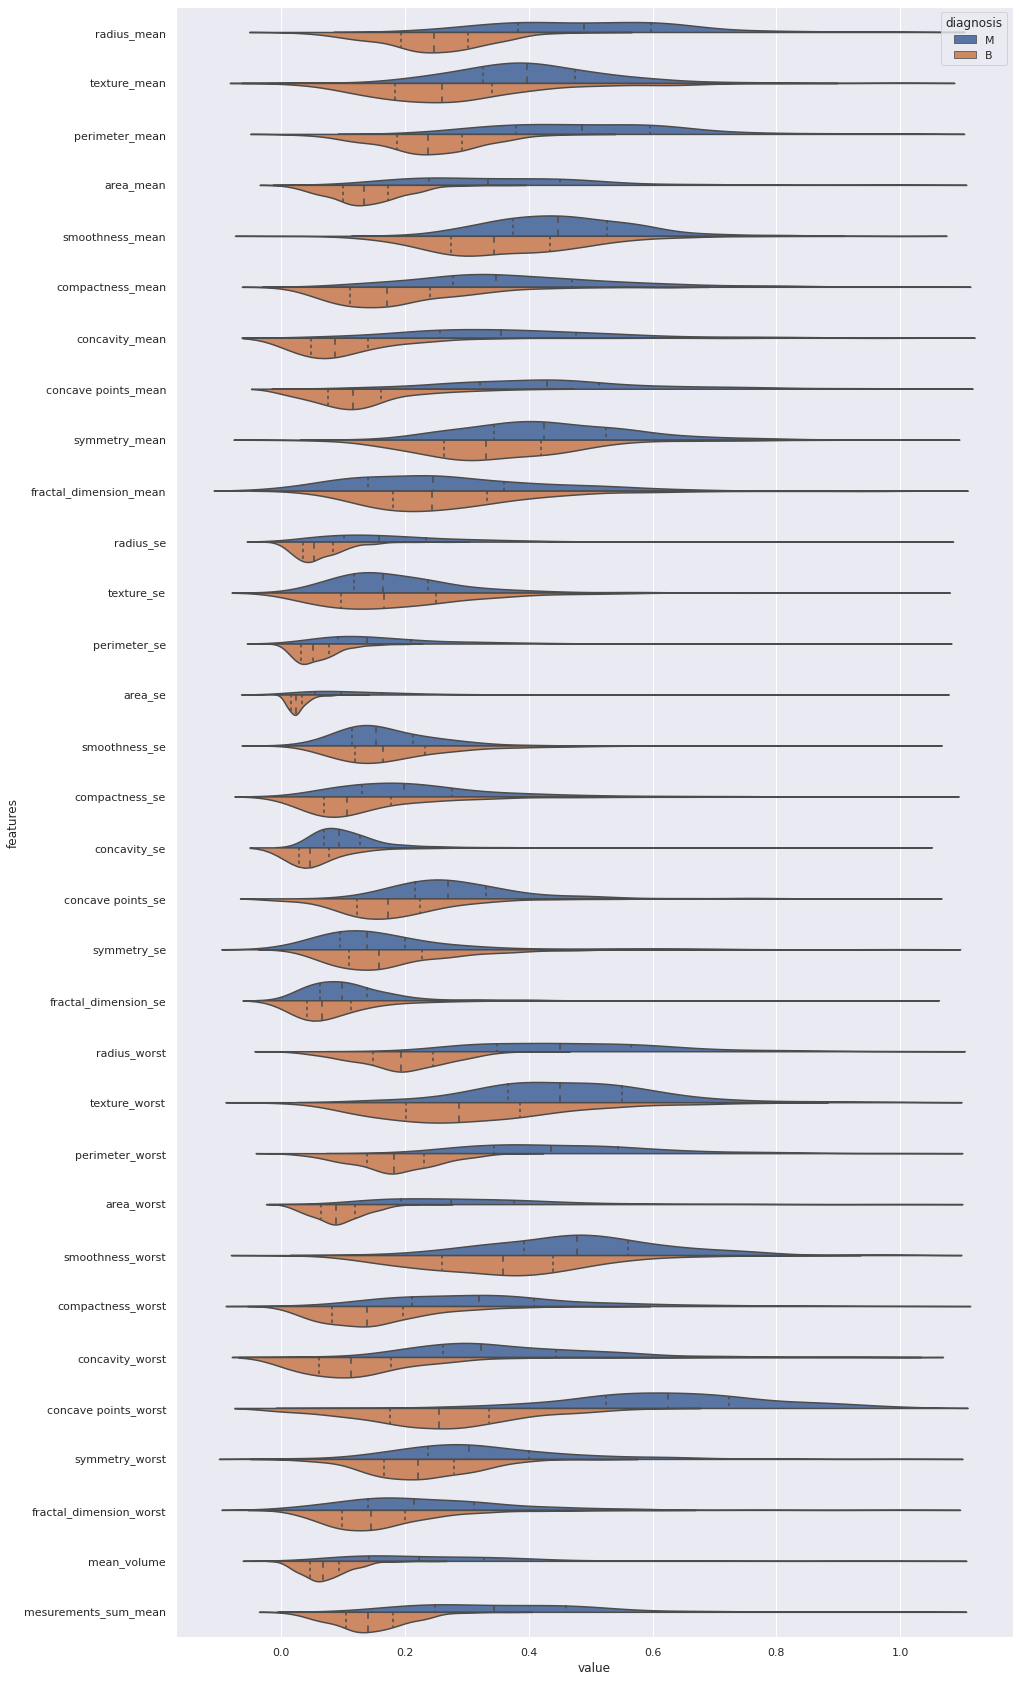

In [23]:
# Preparing data
data_plot = pd.concat([y,scaled_df],axis=1)
data_plot = pd.melt(data_plot,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
# Plotting a violinplot
sns.set(rc={'figure.figsize':(15,30)})
sns.violinplot(x="value", y="features", hue="diagnosis", data=data_plot,split=True, inner="quart")

#A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. 
#It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, 
#violin plots depict summary statistics and the density of each variable.

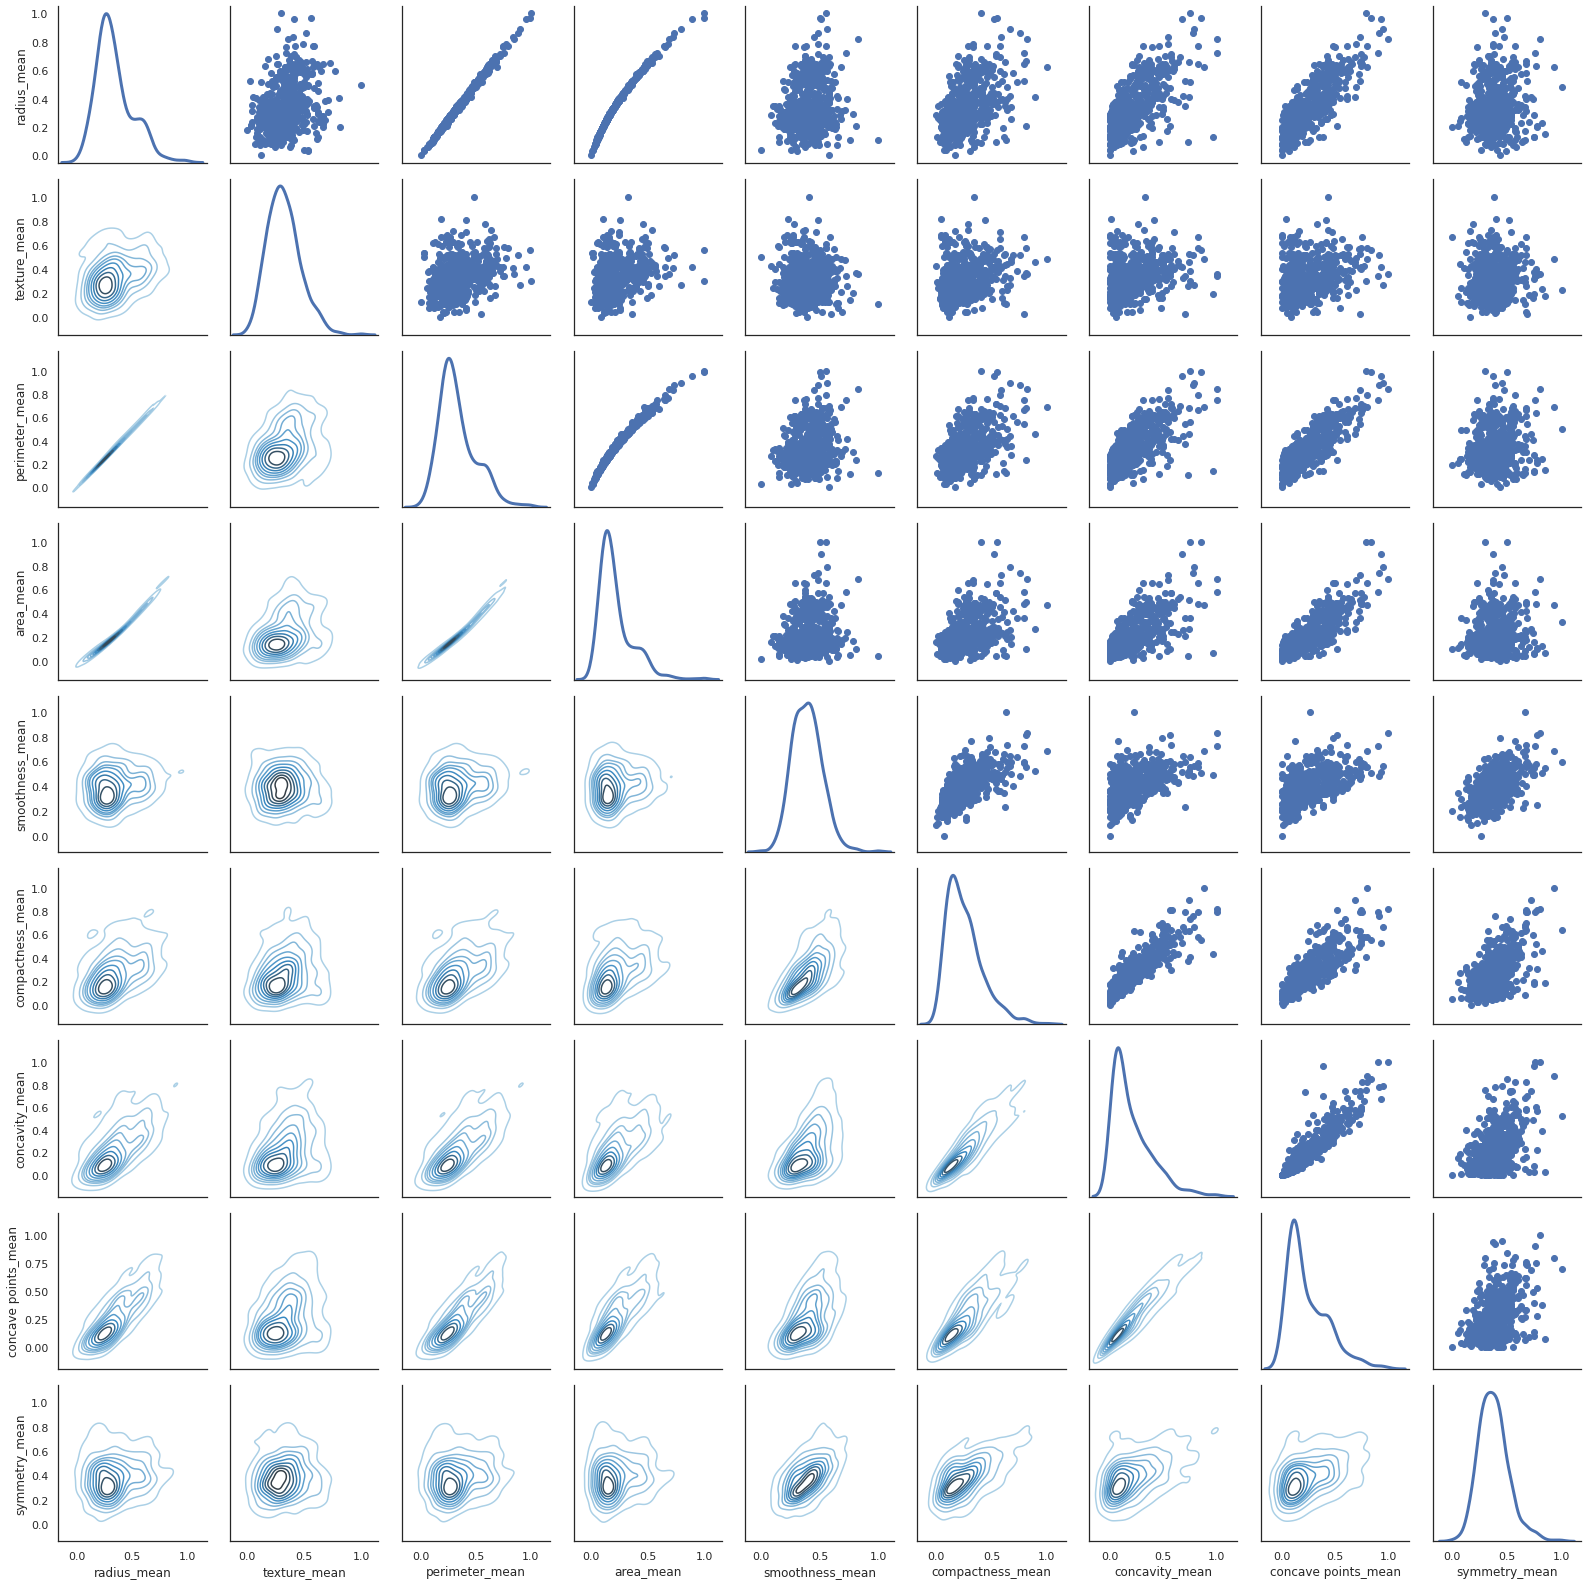

In [24]:
# Ploting a pairplot Grid - to plot pairwise relationships 
sns.set(style="white")
df = scaled_df.iloc[:,0:9]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

<AxesSubplot:xlabel='value', ylabel='features'>

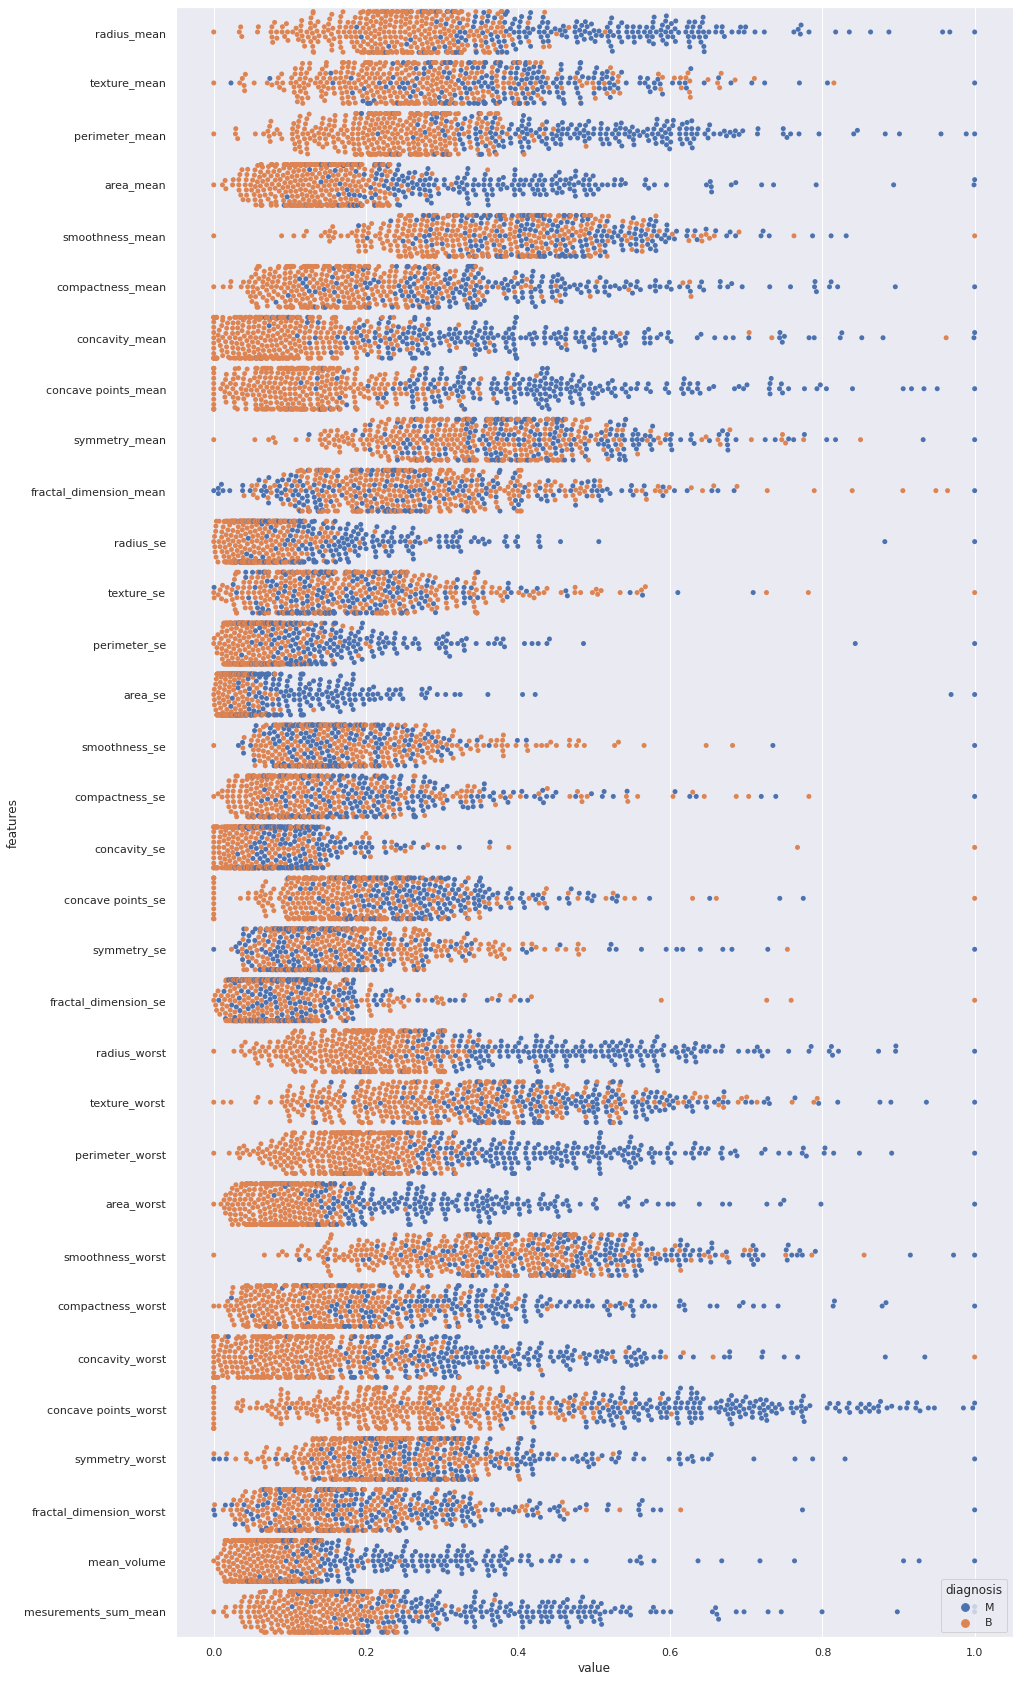

In [25]:
# Plotting a Swarmplot-to show all observations along with some representation of the underlying distribution
sns.set(style="whitegrid", palette="muted")
data_plot = scaled_df
data_plot = pd.concat([y,data_plot.iloc[:,0:]],axis=1)
data_plot = pd.melt(data_plot,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
#plt.figure(figsize=(10,10))
sns.set(rc={'figure.figsize':(15,30)})
sns.swarmplot(x="value", y="features", hue="diagnosis", data=data_plot)

### Outlier Detection:
An outlier is a data point that differs greatly (much smaller or larger than) from other values in a dataset. Outliers may be because of random variation or may demonstrate something scientifically interesting. In any event, we should not simply eliminate the outlying observation before a careful investigation.
There are several reasons for outliers:
1. Some observations in the sample are extreme;
2. The data are inappropriately scaled;
3. Errors were made on data entry.

#### **Using Turkey's outlier detection method(Box Whisker):**
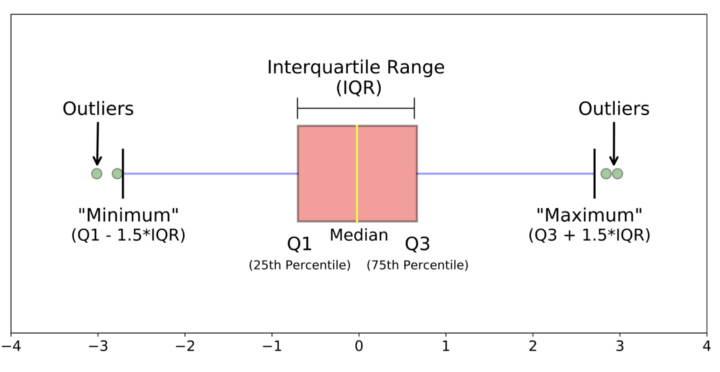

1. **Minimum value**: The smallest value in the data set(Q1–1.5*IQR)
2. **First quartile:** The value below which the lower 25% of the data are contained (Q1)
3. **Median value:** The middle number in a range of numbers (Q2)
4. **Third quartile:** The value above which the upper 25% of the data are contained (Q3)
5. **Maximum value:** The largest value in the data set (Q3+1.5*IQR)
6. **InterQuartile Range(IQR):** Range of observations in a dataset (Q3-Q1)
This method is particularly useful for indicating whether a distribution is skewed and whether there are potential unusual observations in the data set.

In [11]:
# Defining a function to detect outliers using the Turkey's method
def remove_outliers(X, y, f=2, distance=1.5):
    
    """The Function receive Features (X) and Label (y) a frequency (f) and Inter-Quartile distance (distance),  
    and return features and labels without outliers (good_X, good_y)"""
    
    outliers  = []

    # For each feature finding the data points with extreme high or low values
    for feature in X.keys():

        # Calculating Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(X[feature], 25)

        # Calculating Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(X[feature], 75)

        # Using the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3 - Q1) * distance

        outliers.append(X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))].index.values)

    # Selecting the indices for data points we wish to remove
    flat_list = [item for sublist in outliers for item in sublist]
    
    # importing Counter
    from collections import Counter
    freq = Counter(flat_list)
    
    # Creating a list to store outliers to remove
    outliers_to_remove = []
    
    for key, value in freq.items():
        if value > f:
            outliers_to_remove.append(key)

    # Removing the outliers, if any were specified
    good_X = X.drop(X.index[outliers_to_remove]).reset_index(drop = True)
    good_y    = y.drop(y.index[outliers_to_remove]).reset_index(drop = True)
    # Sorting list
    outliers_to_remove.sort()
    # Printing outliers founded
    for i in range(len(outliers_to_remove)):
        print("data point: ", outliers_to_remove[i], "is considered outlier to more than ", f, " feature")

    print("All ", len(outliers_to_remove), "were removed!")
    # returning data without outliers
    return good_X, good_y 


good_X, good_y = remove_outliers(scaled_df, y, f=2, distance=1.5)

data point:  0 is considered outlier to more than  2  feature
data point:  3 is considered outlier to more than  2  feature
data point:  9 is considered outlier to more than  2  feature
data point:  12 is considered outlier to more than  2  feature
data point:  14 is considered outlier to more than  2  feature
data point:  15 is considered outlier to more than  2  feature
data point:  22 is considered outlier to more than  2  feature
data point:  23 is considered outlier to more than  2  feature
data point:  25 is considered outlier to more than  2  feature
data point:  26 is considered outlier to more than  2  feature
data point:  38 is considered outlier to more than  2  feature
data point:  42 is considered outlier to more than  2  feature
data point:  68 is considered outlier to more than  2  feature
data point:  71 is considered outlier to more than  2  feature
data point:  77 is considered outlier to more than  2  feature
data point:  78 is considered outlier to more than  2  fea

In [27]:
# After eliminating the outliers
good_X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.643144      0.272574        0.615783   0.501591         0.289880   
1     0.601496      0.390260        0.595743   0.449417         0.514309   
2     0.629893      0.156578        0.630986   0.489290         0.430351   
3     0.258839      0.202570        0.267984   0.141506         0.678613   
4     0.533343      0.347311        0.523875   0.380276         0.379164   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.181768        0.203608             0.348757       0.379798   
1          0.431017        0.462512             0.635686       0.509596   
2          0.347893        0.463918             0.518390       0.378283   
3          0.461996        0.369728             0.402038       0.518687   
4          0.274891        0.264058             0.367793       0.370707   

   fractal_dimension_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0                0.141323  ...         0.539818    0.435214          0.347553   
1                0.211247  ...         0.508442    0.374508          0.483590   
2                0.186816  ...         0.506948    0.341575          0.437364   
3                0.551179  ...         0.263908    0.136748          0.712739   
4                0.157119  ...         0.511928    0.349194          0.482269   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0           0.154563         0.192971              0.639175        0.233590   
1           0.385375         0.359744              0.835052        0.403706   
2           0.172415         0.319489              0.558419        0.157500   
3           0.482784         0.427716              0.598282        0.477035   
4           0.223448         0.302236              0.663918        0.295289   

   fractal_dimension_worst  mean_volume  mesurements_sum_mean  
0                 0.222878     0.382391              0.509729  
1                 0.213433     0.333471              0.459446  
2                 0.142595     0.366360              0.498988  
3                 0.454939     0.072677              0.149860  
4                 0.187853     0.262358              0.390102  

[5 rows x 32 columns]

In [28]:
good_X.shape

(478, 32)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

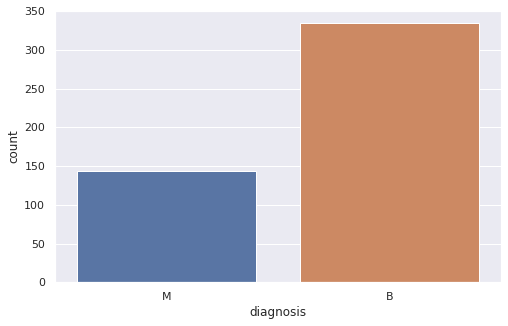

In [29]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(good_y) 

In [30]:
count = y.value_counts()
count2 = good_y.value_counts()

print('Number of Benign removed: ',count[0] - count2[0]) 
print('Number of Malignant removed: ',count[1] - count2[1])

Number of Benign removed:  23
Number of Malignant removed:  68


**Many malignant were considered outilier, this make data even more unbalanced. Later we'll see if removing the outliers improved the results in this dataset or not.**

### Principal Component Analysis (PCA):

Cumulative explained variance:
Dimension 1    0.5066
Dimension 2    0.6731
Name: Explained Variance, dtype: float64


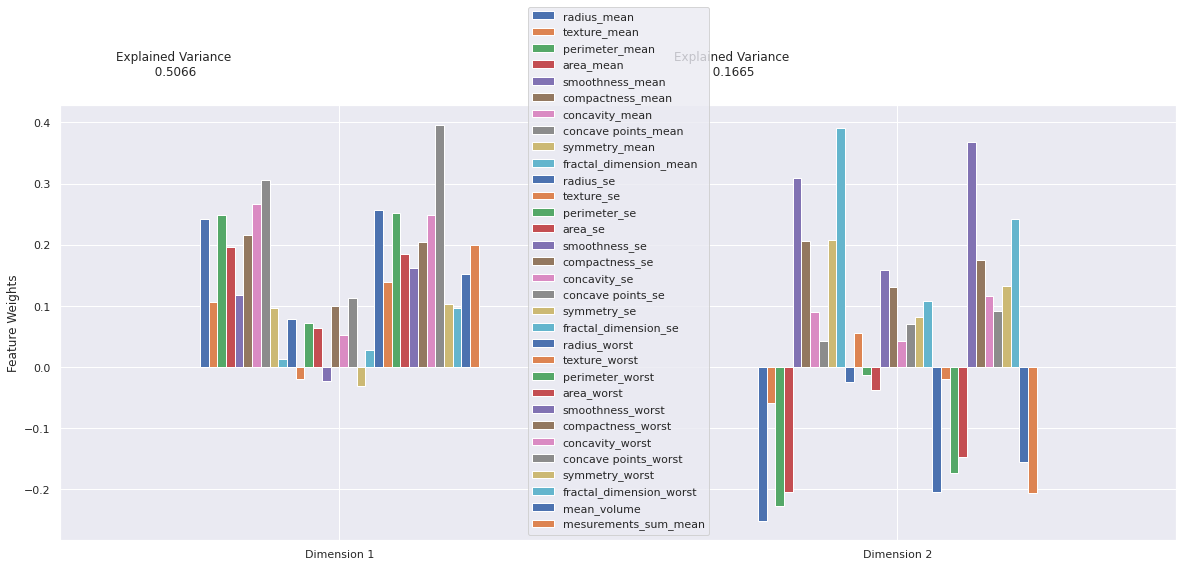

In [31]:
# Applying PCA by fitting the good data to only two dimensions
pca = PCA(n_components=2).fit(good_X)

# Transforming the good data using the PCA fit above
reduced_data = pca.transform(good_X)

# Transforming log_samples using the PCA fit above
pca_samples = pca.transform(good_X)

# Generating PCA results plot
pca_results = vs.pca_results(good_X, pca)

print("Cumulative explained variance:")
print(pca_results['Explained Variance'].cumsum())

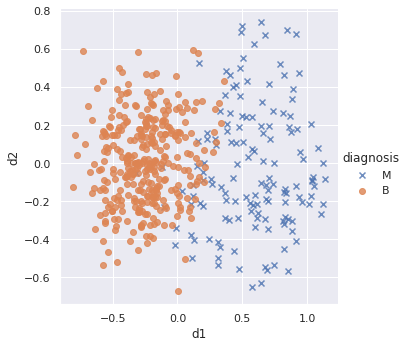

In [32]:
pca_df = pd.DataFrame(pca_samples, columns=["d1", "d2"])

data_plot = pd.concat([good_y,pca_df.iloc[:,0:]],axis=1)

sns.lmplot(x="d1", y="d2", hue="diagnosis", data=data_plot,  markers=["x", "o"], fit_reg=False)

In [33]:
# Applying PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=3)
pca.fit(good_X)

# Transforming log_samples using the PCA fit above
pca_samples = pca.transform(good_X)

In [34]:
pca_df = pd.DataFrame(pca_samples, columns=["d1", "d2", "d3"])

data_plot = pd.concat([good_y,pca_df.iloc[:,0:]],axis=1)
data_plot.head()

diagnosis        d1        d2        d3
0         M  0.692615 -0.558295 -0.226831
1         M  1.139650 -0.085448 -0.150366
2         M  0.812926 -0.301080 -0.399830
3         M  0.499923  0.719246 -0.187294
4         M  0.674242 -0.292226 -0.095475

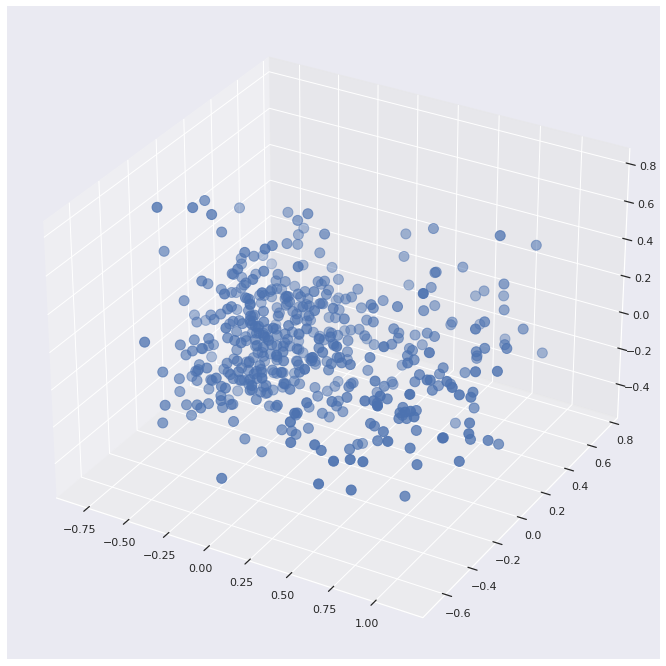

In [35]:
# 3D plot
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_plot['d1'], data_plot['d2'], data_plot['d3'], s=100)
#ax.view_init(30, 185)
plt.show()

In [36]:
def pca(X, n_components=3):
    
    """The function receives features (X), and a target number of components (n_components),
    and returns a PCA transformed with n_components dimentions"""

    pca = PCA(n_components)
    pca.fit(X)

    # Transforming log_samples using the PCA fit above
    pca_samples = pca.transform(X)

    return pd.DataFrame(pca_samples)
    

pca_df = pca(X, 3)
pca_df.head()

0           1           2
0  10258.198985 -689.651652  106.500059
1  22321.573082 -102.143913  -25.255216
2  17830.036487  -58.701094  -45.523263
3  -7959.822056  -21.079974   66.438676
4  20837.353069  195.675444 -126.343424

**On observing the after Principal Component Analysis (PCA) results, we can see that it will be necessary to incorporate many dimensions/PCA components to explain data variance, so avoiding it and moving on to dealing with the imbalance in the dataset.**

### Imbalanced Learning:
#### **Naive random over-sampling:**
One way to fight this issue is to generate new samples in the classes which are under-represented. The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples. The RandomOverSampler offers such scheme:

***Ref***: 1.  https://imbalanced-learn.org/stable/over_sampling.html <br>
           2.  https://imbalanced-learn.org/stable/over_sampling.html?highlight=smote

[('B', 357), ('M', 357)]


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

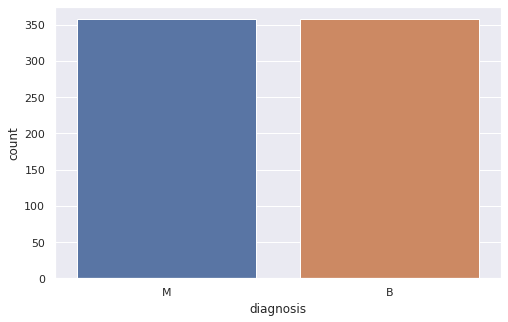

In [13]:
from imblearn.over_sampling import RandomOverSampler
X_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(y_resampled) 

#### **From random over-sampling to SMOTE and ADASYN**
Apart from the random sampling with replacement, there is two popular methods to over-sample minority classes: 
(i) Synthetic Minority Oversampling Technique (SMOTE) and 
(ii) Adaptive Synthetic (ADASYN) sampling method. 
These algorithm can be used in the same manner:

[('B', 357), ('M', 357)]


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

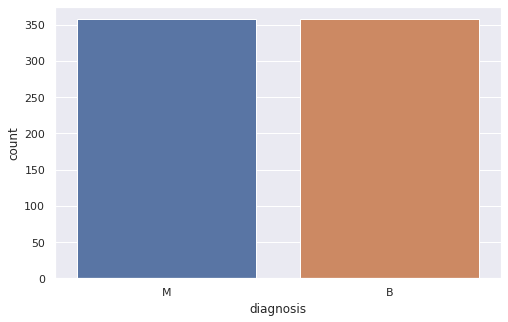

In [14]:
#SMOTE
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(y_resampled) 

[('B', 357), ('M', 358)]


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

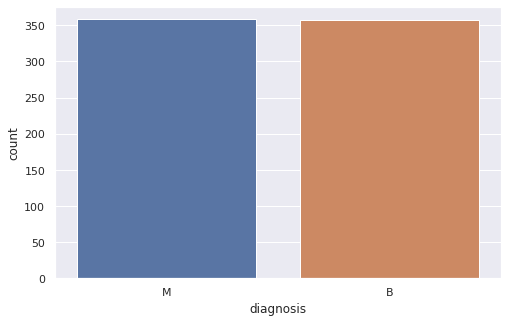

In [15]:
#ADASYN
X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(y_resampled) 

[('B', 357), ('M', 357)]


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

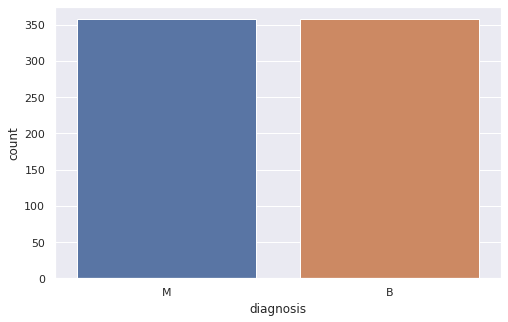

In [16]:
# Defining a function to rebalance data with different methods for ease at later stages
def resample(X,y, method="RandomOverSampler"):
    
    """The function receive features and labels (X, y) and a method to balance data
    available methods RandomOverSampler, ADASYN, SMOTE
    
    The funcion returns X_resampled, y_resampled"""
    
    if method == "RandomOverSampler":
        X_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)
    if method == "ADASYN":
        X_resampled, y_resampled = ADASYN().fit_resample(X, y)
    else:
        X_resampled, y_resampled = SMOTE().fit_resample(X, y)
        
    print(sorted(Counter(y_resampled).items()))
    
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
        
    return X_resampled, y_resampled


# choose between RandomOverSampler, ADASYN, SMOTE
X_resampled, y_resampled = resample(X,y, "SMOTE")

sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(y_resampled) 

### Feature Selection using [Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) :
Feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. SelectKBest removes all but the k highest scoring features.

***REF:*** https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
def selector(X, y, a):
    
    """The function receives features and labels (X, y) and a target number to select features (k)
    and returns a new dataset wiht k best features"""
    
    selector1 = SelectKBest(chi2, k=a)
    X_new = selector1.fit_transform(X, y)
    return pd.DataFrame(X_new, columns=X.columns[selector1.get_support()])

X_new = selector(X, y, 5)

X_new.head()

perimeter_mean  area_mean  area_se  perimeter_worst  area_worst
0          122.80     1001.0   153.40           184.60      2019.0
1          132.90     1326.0    74.08           158.80      1956.0
2          130.00     1203.0    94.03           152.50      1709.0
3           77.58      386.1    27.23            98.87       567.7
4          135.10     1297.0    94.44           152.20      1575.0

### Importing different Classifier Algorithms and setting parameters:
#### [**Grid Search**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
Exhaustive search over specified parameter values for an estimator. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [65]:
y = data["diagnosis"]
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

In [18]:
# Random Forest Classifier 
RF_clf = RandomForestClassifier()
# Parameters to tune
RF_par = {"max_depth": [3, None], "max_features": [1, 3, 10], "min_samples_split": [2, 3, 10], 
          "min_samples_leaf": [1, 3, 10], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}

# Extra Trees Classifier
XT_clf = ExtraTreesClassifier()
# Parameters to tune
XT_par = { 'n_estimators': [5, 10, 16], "min_samples_split": [2, 3, 10], "min_samples_leaf": [1, 3, 10]}

# Decision Tree Classifier
DT_clf =DecisionTreeClassifier()
# Parameters to tune
DT_par = { 'splitter': ['best', ], "min_samples_split": [2, 3, 10], "min_samples_leaf": [1, 3, 10]}

# Support Vector Machine Classifier
SV_clf = svm.SVC()
# Parameters to tune
SV_par = {'kernel': ['rbf'], 'C': [1]}

# AdaBoost Classifier
AD_clf = AdaBoostClassifier()
# Parameters to tune
AD_par = {'n_estimators':[10, 20, 50, 60], 'learning_rate':[0.1, 0.5, 1.0, 1.5], 'algorithm':['SAMME.R', 'SAMME']}

# Gradient Boosting Classifier
GB_clf = GradientBoostingClassifier()
# Parameters to tune
GB_par = {'loss':['deviance', 'exponential'], 'learning_rate':[0.01, 0.1, 0.5, 1.0], 'n_estimators':[50, 100, 150], 
          "min_samples_split": [2, 3], "min_samples_leaf": [1, 3], 'max_depth':[2, 3, 5]}

# SGD Classifier
SG_clf = SGDClassifier()
# Parameters to tune
SG_par = {'loss':['hinge', 'log', 'squared_hinge', 'perceptron'], 'penalty':['l2', 'l1'], 
          'alpha':[0.00001, 0.0001, 0.001], 'epsilon':[0.01, 0.1, 0.5]}

# Logistic Regression
LR_clf = LogisticRegression()
# Parameters to tune
LR_par= {'penalty':['l1','l2'], 'C': [0.5, 1, 5, 10], 'max_iter':[50, 100, 150, 200]}

# XGB Classifier
XB_clf = XGBClassifier()
# Parameters to tune
XB_par = {'max_depth':[2, 3, 5], 'learning_rate':[0.01, 0.1, 0.5, 1], 'n_estimators':[50, 100, 150, 200], 'gamma':[0, 0.001, 0.01, 0.1]}

# KNN Classifier
KNN_clf = KNeighborsClassifier()
# Parameters to tune
KNN_par = {'n_neighbors':[11, 13, 15, 17]}

classifiers = [RF_clf, XT_clf, DT_clf, SV_clf, AD_clf, GB_clf, SG_clf, LR_clf, XB_clf, KNN_clf]

classifiers_names = ['Random Forest', 'Extra DecisionTrees', 'Decision Tree',
                     'Support Vector', 'AdaBoost Classifier', 'Gradient Boosting',
                     'SGD Classifier', 'Logistic Regression', 'XGB Classifier',
                     'KNN Classifier']

parameters = [RF_par, XT_par, DT_par, SV_par, AD_par, GB_par, SG_par, LR_par, XB_par, KNN_par]

In [19]:
def tune_compare_clf(X, y, classifiers, parameters, classifiers_names):
    
    '''The function receives Data (X, y), a classifiers list, 
    a list of parameters to tune each classifier (each one is a dictionary), 
    and a list with classifier's name. 
    
    The function splits the data in Train and Test data, 
    train and tune all algorithms and prints the results using F1 score.
    
    The function also returns a Dataframe with predictions, each row is a classifier prediction,
    and X_test and y_test.
    '''
    #80-20 split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    print("\n" "Train size : ", X_train.shape, " and Train labels : ", y_train.shape, "\n")

    print("Test size: ", X_test.shape, " and Test labels : ", y_test.shape, "\n", "\n")
    
    results = []
    
    #print("  ---- F1 Score  ----  ", "\n")
    
    for clf, par, name in zip(classifiers, parameters, classifiers_names):
        # Storing results in results list
        clf_tuned = GridSearchCV(clf, par).fit(X_train, y_train)
        y_pred = clf_tuned.predict(X_test)
        results.append(y_pred)   
        print("  ----  "+name+"  ----  ")
        print("F1-SCORE: %.2f%%" % (f1_score(y_test, y_pred, average='weighted') * 100.0))
        print("ACCURACY: %.2f%%" % (accuracy_score(y_test, y_pred) * 100.0))
        print("The best estimator across ALL searched params: ",clf_tuned.best_estimator_)
        print("The best score across ALL searched params: ",clf_tuned.best_score_)
        print("The best parameters across ALL searched params: ",clf_tuned.best_params_)
        print("\n")
        print("\n")

    result = pd.DataFrame.from_records(results)   
    
    return result, X_test,  y_test

In [23]:
result, X_test, y_test = tune_compare_clf(X, y, classifiers, parameters, classifiers_names)


Train size :  (455, 30)  and Train labels :  (455,) 

Test size:  (114, 30)  and Test labels :  (114,) 
 

  ----  Random Forest  ----  
F1-SCORE: 97.36%
ACCURACY: 97.37%
The best estimator across ALL searched params:  RandomForestClassifier(bootstrap=False, max_features=1, min_samples_split=3)
The best score across ALL searched params:  0.9648351648351647
The best parameters across ALL searched params:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 97.36%
ACCURACY: 97.37%
The best estimator across ALL searched params:  ExtraTreesClassifier(min_samples_split=3, n_estimators=10)
The best score across ALL searched params:  0.9626373626373625
The best parameters across ALL searched params:  {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}




  ----  Decision Tree  ----  
F1-SCORE: 94.71%
ACCURACY: 94.74%
The best estimator across ALL searc

#### **Result Dataset**
Storing all classifiers predictions, each column is a data point and rows is prediction of each classifiers, we can use describe() function to undestand what is more common prediction for each data point, this way we're collecting the "votes" for each data point.

In [24]:
result

0    1    2    3    4    5    6    7    8    9    ...  104  105  106  107  \
0    0    1    1    0    0    1    1    1    1    0  ...    0    0    0    1   
1    0    1    1    0    0    1    1    1    1    0  ...    0    0    0    1   
2    0    1    1    0    0    1    1    1    1    0  ...    0    0    0    1   
3    0    1    1    0    0    1    1    1    0    0  ...    0    0    0    1   
4    0    1    1    0    0    1    1    1    1    0  ...    0    0    0    1   
5    0    1    1    0    0    1    1    1    1    0  ...    0    0    0    1   
6    0    1    1    0    0    1    1    1    0    0  ...    0    0    0    1   
7    0    1    1    0    0    1    1    1    0    0  ...    0    0    0    1   
8    0    1    1    0    0    1    1    1    1    0  ...    0    0    0    1   
9    0    1    1    0    0    1    1    1    0    0  ...    0    0    0    1   

   108  109  110  111  112  113  
0    0    0    1    0    0    1  
1    0    0    1    0    0    1  
2    1    0    1    0    0    1  
3    0    0    1    0    0    1  
4    0    0    1    0    0    1  
5    1    0    1    0    0    1  
6    0    0    1    0    0    1  
7    0    0    1    0    1    1  
8    0    0    1    0    0    1  
9    0    0    1    0    0    1  

[10 rows x 114 columns]

**As observed the Random Forest classifier, Extra Tree classifiers and the XGBoost classifier gives the best accuracy and the F1 score of 97.37% and 97.36% respectively on the original dataset (without addition of any calculated feature)**

In [66]:
#re-fitting the best model and saving it
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
xgb_classifier = XGBClassifier(gamma=0, learning_rate=0.5, max_depth=2, n_estimators=100)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.9736842105263158

<AxesSubplot:>

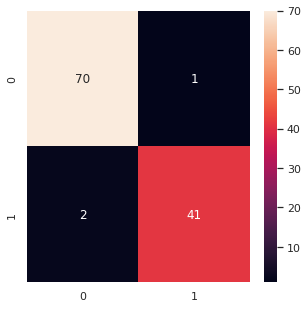

In [67]:
import pickle
filename = 'breastCancer_model0v2.sav'
pickle.dump(xgb_classifier, open(filename,'wb'))

#plotting confusion matrix
sns.set(rc={'figure.figsize':(5,5)})
cm = confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(cm,annot=True,fmt="d")

In [104]:
#checking if the saved model works
loaded_model = pickle.load(open(filename, 'rb'))
result1 = loaded_model.score(X_test, y_test)
print(result1)

0.9736842105263158


### Testing Algorithms with different Data Manipulation Techniques:
Before in this nb we defined and tested different aproaches to use our original dataset and created some functions as follows:
* scaler(X)
* selector(X, y, k)
* remove_outliers(X, y, f, distance)
* resample(X, y, method)

Now we'll test using:
* tune_compare_clf(X, y, classifiers, parameters, classifiers_names) - a function to tune each algorithm to the given data and print its F1 and accuracy scores.

With different technique or set of techniques it'd more effective for this dataset to minimize error when classifying Breast Cancer.

In [68]:
y = data["diagnosis"]
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)
X = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

mean_volume = []
pi = 3.1415

for i in range(len(X)):
    
    mean_volume.append((math.pow(X["radius_mean"][i], 3)*4*pi)/3)

X["mean_volume"]= mean_volume  
X["measurements_sum_mean"] = X["radius_mean"] + X["perimeter_mean"] + X["area_mean"]
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0                 0.07871  ...           184.60      2019.0            0.1622   
1                 0.05667  ...           158.80      1956.0            0.1238   
2                 0.05999  ...           152.50      1709.0            0.1444   
3                 0.09744  ...            98.87       567.7            0.2098   
4                 0.05883  ...           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst   mean_volume  measurements_sum_mean  
0                  0.11890  24387.612775                1141.79  
1                  0.08902  36456.810913                1479.47  
2                  0.08758  31975.176401                1352.69  
3                  0.17300   6238.412850                 475.10  
4                  0.07678  34988.227503                1452.39  

[5 rows x 32 columns]

#### **Data Original plus feature engineering [mean_volume and measurements_sum_mean]**

In [111]:
result2, X_test, y_test = tune_compare_clf(X, y, classifiers, parameters, classifiers_names)


Train size :  (455, 32)  and Train labels :  (455,) 

Test size:  (114, 32)  and Test labels :  (114,) 
 

  ----  Random Forest  ----  
F1-SCORE: 96.47%
ACCURACY: 96.49%
The best estimator across ALL searched params:  RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=1,
                       min_samples_leaf=3, min_samples_split=3)
The best score across ALL searched params:  0.9692307692307691
The best parameters across ALL searched params:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 3}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 96.47%
ACCURACY: 96.49%
The best estimator across ALL searched params:  ExtraTreesClassifier(min_samples_leaf=3, min_samples_split=3, n_estimators=16)
The best score across ALL searched params:  0.9648351648351647
The best parameters across ALL searched params:  {'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 16}




  ----  Deci

**As observed the XGBoost classifier gives the best accuracy and the F1 score on the original dataset**

<AxesSubplot:>

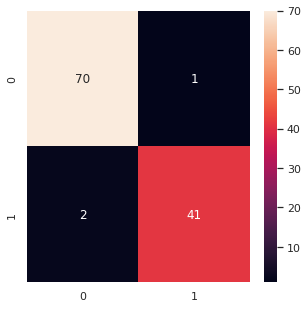

In [113]:
#re-fitting the best model i.e. and saving it
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
xgb_classifier2 = XGBClassifier(gamma=0, learning_rate=0.5, max_depth=2, n_estimators=100)
xgb_classifier2.fit(X_train, y_train)
y_pred_xgb2 = xgb_classifier2.predict(X_test)
accuracy_score(y_test, y_pred_xgb2)

import pickle
filename = 'breastCancer_model2.sav'
pickle.dump(xgb_classifier2, open(filename,'wb'))

#plotting confusion matrix
sns.set(rc={'figure.figsize':(5,5)})
cm = confusion_matrix(y_test,y_pred_xgb2)
sns.heatmap(cm,annot=True,fmt="d")

#### **Scale**

In [115]:
X_scaled = scaler(X)

result3, X_test, y_test = tune_compare_clf(X_scaled, y, classifiers, parameters, classifiers_names)


Train size :  (455, 32)  and Train labels :  (455,) 

Test size:  (114, 32)  and Test labels :  (114,) 
 

  ----  Random Forest  ----  
F1-SCORE: 96.47%
ACCURACY: 96.49%
The best estimator across ALL searched params:  RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=3,
                       min_samples_leaf=3)
The best score across ALL searched params:  0.9692307692307691
The best parameters across ALL searched params:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 96.47%
ACCURACY: 96.49%
The best estimator across ALL searched params:  ExtraTreesClassifier(n_estimators=16)
The best score across ALL searched params:  0.9714285714285715
The best parameters across ALL searched params:  {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 16}




  ----  Decision Tree  ----  
F1-SCORE: 95.60%
ACCURACY: 95.61%
The best e

**As observed the SVM, SGD, Logistic Regression and XGBoost classifier gives the best and similar accuracy and the F1 score on the scaled + feature engineering dataset. It can also be noticed that the both the scores for the KNN classifier improved**

<AxesSubplot:>

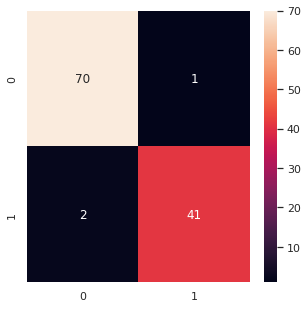

In [116]:
#re-fitting the best model i.e. and saving it
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
sgd_classifier = SGDClassifier(alpha=0.001, epsilon=0.01, loss='log', penalty='l1')
sgd_classifier.fit(X_train, y_train)
y_pred_sgd = sgd_classifier.predict(X_test)
accuracy_score(y_test, y_pred_sgd)

import pickle
filename = 'breastCancer_model3_sgd_scaled.sav'
pickle.dump(sgd_classifier, open(filename,'wb'))

#plotting confusion matrix
sns.set(rc={'figure.figsize':(5,5)})
cm = confusion_matrix(y_test,y_pred_sgd)
sns.heatmap(cm,annot=True,fmt="d")

#### **Outliers**

In [119]:
y = data["diagnosis"]

In [120]:
X_good, y_good = remove_outliers(X, y, f=2, distance=2)

data point:  0 is considered outlier to more than  2  feature
data point:  3 is considered outlier to more than  2  feature
data point:  9 is considered outlier to more than  2  feature
data point:  12 is considered outlier to more than  2  feature
data point:  25 is considered outlier to more than  2  feature
data point:  38 is considered outlier to more than  2  feature
data point:  42 is considered outlier to more than  2  feature
data point:  68 is considered outlier to more than  2  feature
data point:  71 is considered outlier to more than  2  feature
data point:  78 is considered outlier to more than  2  feature
data point:  82 is considered outlier to more than  2  feature
data point:  108 is considered outlier to more than  2  feature
data point:  112 is considered outlier to more than  2  feature
data point:  122 is considered outlier to more than  2  feature
data point:  138 is considered outlier to more than  2  feature
data point:  146 is considered outlier to more than  2

In [125]:
labelencoder_Y = LabelEncoder()
y_good = labelencoder_Y.fit_transform(y_good)

In [127]:
result4, X_test, y_test = tune_compare_clf(X_good, y_good, classifiers, parameters, classifiers_names)


Train size :  (410, 32)  and Train labels :  (410,) 

Test size:  (103, 32)  and Test labels :  (103,) 
 

  ----  Random Forest  ----  
F1-SCORE: 96.16%
ACCURACY: 96.12%
The best estimator across ALL searched params:  RandomForestClassifier(max_features=10, min_samples_split=10)
The best score across ALL searched params:  0.9707317073170731
The best parameters across ALL searched params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 97.10%
ACCURACY: 97.09%
The best estimator across ALL searched params:  ExtraTreesClassifier(n_estimators=16)
The best score across ALL searched params:  0.9658536585365853
The best parameters across ALL searched params:  {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 16}




  ----  Decision Tree  ----  
F1-SCORE: 91.24%
ACCURACY: 91.26%
The best estimator across ALL searched params:  DecisionTreeClassifier

**As observed the Extra tree classifier gives the best accuracy and the F1 score of 97.09% and 97.10% respectively on the dataset with feature engineering columns and the outliers removed but is less compared to the scores on other set of techniques**

#### **Feature Selection (12 features):** 

In [59]:
X_selected = selector(X, y, 12)

In [60]:
X_selected.head()

radius_mean  texture_mean  perimeter_mean  area_mean  perimeter_se  \
0        17.99         10.38          122.80     1001.0         8.589   
1        20.57         17.77          132.90     1326.0         3.398   
2        19.69         21.25          130.00     1203.0         4.585   
3        11.42         20.38           77.58      386.1         3.445   
4        20.29         14.34          135.10     1297.0         5.438   

   area_se  radius_worst  texture_worst  perimeter_worst  area_worst  \
0   153.40         25.38          17.33           184.60      2019.0   
1    74.08         24.99          23.41           158.80      1956.0   
2    94.03         23.57          25.53           152.50      1709.0   
3    27.23         14.91          26.50            98.87       567.7   
4    94.44         22.54          16.67           152.20      1575.0   

    mean_volume  measurements_sum_mean  
0  24387.612775                1141.79  
1  36456.810913                1479.47  
2  31975.176401                1352.69  
3   6238.412850                 475.10  
4  34988.227503                1452.39

In [131]:
result5, X_test, y_test = tune_compare_clf(X_selected, y, classifiers, parameters, classifiers_names)


Train size :  (455, 12)  and Train labels :  (455,) 

Test size:  (114, 12)  and Test labels :  (114,) 
 

  ----  Random Forest  ----  
F1-SCORE: 95.60%
ACCURACY: 95.61%
The best estimator across ALL searched params:  RandomForestClassifier(criterion='entropy', max_features=10)
The best score across ALL searched params:  0.9516483516483516
The best parameters across ALL searched params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 95.60%
ACCURACY: 95.61%
The best estimator across ALL searched params:  ExtraTreesClassifier(min_samples_leaf=3, min_samples_split=10, n_estimators=5)
The best score across ALL searched params:  0.9538461538461538
The best parameters across ALL searched params:  {'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 5}




  ----  Decision Tree  ----  
F1-SCORE: 92.86%
ACCURACY: 92.98%
The best estimator across AL

**As observed the Logistic regression classifier gives the best accuracy and F1 score of 96.49% and 96.47% respectively on the dataset with 12 columns selected but is less compared to the scores on other set of techniques**

In [61]:
#re-fitting the best model i.e. and saving it
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42)
lr_classifier = LogisticRegression(C=5, max_iter=200)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.9649122807017544

<AxesSubplot:>

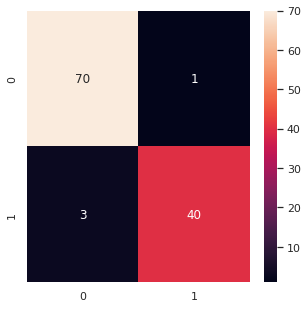

In [62]:
import pickle
filename = 'breastCancer_model4.2_lr_12fea.sav'
pickle.dump(lr_classifier, open(filename,'wb'))

#plotting confusion matrix
sns.set(rc={'figure.figsize':(5,5)})
cm = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt="d")

#### **Feature Selection (10 Features)**

In [54]:
X_selected2 = selector(X, y, 10)

In [55]:
X_selected2.head()

radius_mean  perimeter_mean  area_mean  perimeter_se  area_se  \
0        17.99          122.80     1001.0         8.589   153.40   
1        20.57          132.90     1326.0         3.398    74.08   
2        19.69          130.00     1203.0         4.585    94.03   
3        11.42           77.58      386.1         3.445    27.23   
4        20.29          135.10     1297.0         5.438    94.44   

   radius_worst  perimeter_worst  area_worst   mean_volume  \
0         25.38           184.60      2019.0  24387.612775   
1         24.99           158.80      1956.0  36456.810913   
2         23.57           152.50      1709.0  31975.176401   
3         14.91            98.87       567.7   6238.412850   
4         22.54           152.20      1575.0  34988.227503   

   measurements_sum_mean  
0                1141.79  
1                1479.47  
2                1352.69  
3                 475.10  
4                1452.39

In [158]:
result6, X_test, y_test = tune_compare_clf(X_selected2, y, classifiers, parameters, classifiers_names)


Train size :  (455, 10)  and Train labels :  (455,) 

Test size:  (114, 10)  and Test labels :  (114,) 
 

  ----  Random Forest  ----  
F1-SCORE: 98.24%
ACCURACY: 98.25%
The best estimator across ALL searched params:  RandomForestClassifier(criterion='entropy', max_features=3, min_samples_leaf=10,
                       min_samples_split=3)
The best score across ALL searched params:  0.9252747252747253
The best parameters across ALL searched params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 3}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 96.45%
ACCURACY: 96.49%
The best estimator across ALL searched params:  ExtraTreesClassifier(min_samples_leaf=3, min_samples_split=3, n_estimators=10)
The best score across ALL searched params:  0.9296703296703297
The best parameters across ALL searched params:  {'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 10}




  ----  Decision Tree  ---- 

**As observed the Logistic regression classifier gives the best accuracy and F1 score of 98.25% and 98.25% respectively on the dataset with 10 columns selected which is the highest score achieved compared to all techniques applied till now, followed by the Random Forest classifier-(98.25%,98.24%)**

In [56]:
#re-fitting the best model i.e. and saving it
X_train, X_test, y_train, y_test = train_test_split(X_selected2, y, test_size=0.20, random_state=42)
lr_classifier2 = LogisticRegression(C=5, max_iter=200)
lr_classifier2.fit(X_train, y_train)
y_pred_lr2 = lr_classifier2.predict(X_test)
accuracy_score(y_test, y_pred_lr2)

0.9824561403508771

<AxesSubplot:>

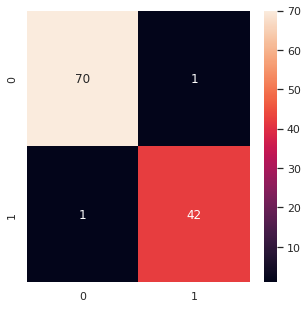

In [57]:
import pickle
filename = 'breastCancer_model4.2_lr_10fea.sav'
pickle.dump(lr_classifier2, open(filename,'wb'))

#plotting confusion matrix
sns.set(rc={'figure.figsize':(5,5)})
cm = confusion_matrix(y_test,y_pred_lr2)
sns.heatmap(cm,annot=True,fmt="d")

#### **Resample Method 1**

In [20]:
X_new1, y_new1 = resample(X, y, method="RandomOverSampler")

[('B', 357), ('M', 357)]


In [162]:
result7, X_test, y_test = tune_compare_clf(X_new1, y_new1, classifiers, parameters, classifiers_names)


Train size :  (571, 32)  and Train labels :  (571,) 

Test size:  (143, 32)  and Test labels :  (143,) 
 

  ----  Random Forest  ----  
F1-SCORE: 95.10%
ACCURACY: 95.10%
The best estimator across ALL searched params:  RandomForestClassifier(criterion='entropy', max_features=10)
The best score across ALL searched params:  0.9754843630816172
The best parameters across ALL searched params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 95.80%
ACCURACY: 95.80%
The best estimator across ALL searched params:  ExtraTreesClassifier(min_samples_leaf=3, min_samples_split=3, n_estimators=10)
The best score across ALL searched params:  0.9702364607170099
The best parameters across ALL searched params:  {'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 10}




  ----  Decision Tree  ----  
F1-SCORE: 94.41%
ACCURACY: 94.41%
The best estimator across AL

**As observed the Logistic Regression classifier gives the best accuracy and F1 score of 97.90% on the dataset resampled using the Naive Random Oversampling method.**

<AxesSubplot:>

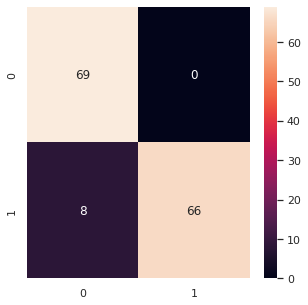

In [34]:
#re-fitting the best model i.e. and saving it
X_train, X_test, y_train, y_test = train_test_split(X_new1, y_new1, test_size=0.20, random_state=42)
lr_classifier3 = LogisticRegression(C=1, max_iter=200)
lr_classifier3.fit(X_train, y_train)
y_pred_lr3 = lr_classifier3.predict(X_test)
accuracy_score(y_test, y_pred_lr3)

import pickle
filename = 'breastCancer_model5_lr_NROM.sav'
pickle.dump(lr_classifier3, open(filename,'wb'))

#plotting confusion matrix
sns.set(rc={'figure.figsize':(5,5)})
cm = confusion_matrix(y_test,y_pred_lr3)
sns.heatmap(cm,annot=True,fmt="d")

#### **Resample Method 2 (SMOTE)**

In [29]:
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)
X_new2, y_new2 = resample(X, y, method="SMOTE")

[(0, 357), (1, 357)]


In [30]:
result8, X_test, y_test = tune_compare_clf(X_new2, y_new2, classifiers, parameters, classifiers_names)


Train size :  (571, 32)  and Train labels :  (571,) 

Test size:  (143, 32)  and Test labels :  (143,) 
 

  ----  Random Forest  ----  
F1-SCORE: 95.81%
ACCURACY: 95.80%
The best estimator across ALL searched params:  RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=10)
The best score across ALL searched params:  0.973714721586575
The best parameters across ALL searched params:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 96.50%
ACCURACY: 96.50%
The best estimator across ALL searched params:  ExtraTreesClassifier(min_samples_split=3, n_estimators=16)
The best score across ALL searched params:  0.9737299771167048
The best parameters across ALL searched params:  {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 16}




  ----  Decision Tree  ----  
F1-SCORE: 93.00%
ACCURACY: 93.01%
The best estimator across ALL s

**As observed the ExtraTree and the Gradient Boosting classifier gives the best and the same accuracy and F1 score of 96.50% on the dataset resampled using the SMOTE method**

#### **Resample Method 3 (ADASYN)**

In [31]:
X_new3, y_new3 = resample(X, y, method="ADASYN")

[(0, 357), (1, 359)]


In [32]:
result9, X_test, y_test = tune_compare_clf(X_new3, y_new3, classifiers, parameters, classifiers_names)


Train size :  (572, 32)  and Train labels :  (572,) 

Test size:  (144, 32)  and Test labels :  (144,) 
 

  ----  Random Forest  ----  
F1-SCORE: 95.13%
ACCURACY: 95.14%
The best estimator across ALL searched params:  RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=10,
                       min_samples_split=3)
The best score across ALL searched params:  0.9754843630816172
The best parameters across ALL searched params:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 96.52%
ACCURACY: 96.53%
The best estimator across ALL searched params:  ExtraTreesClassifier(min_samples_split=3, n_estimators=16)
The best score across ALL searched params:  0.9649580472921434
The best parameters across ALL searched params:  {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 16}




  ----  Decision Tree  ----  
F1-SCORE: 93.02%
ACC

**As observed the XGBoost classifier gives the best accuracy and F1 score of 97.22% on the dataset resampled using the ADASYN method.**

#### **Scale and Outiliers Remove**

In [35]:
y = data["diagnosis"]
X_scaled = scaler(X)
X_good2, y_good2 = remove_outliers(X_scaled, y, f=2, distance=2)
X_good2.shape
X_good2.head()

data point:  0 is considered outlier to more than  2  feature
data point:  3 is considered outlier to more than  2  feature
data point:  9 is considered outlier to more than  2  feature
data point:  12 is considered outlier to more than  2  feature
data point:  25 is considered outlier to more than  2  feature
data point:  38 is considered outlier to more than  2  feature
data point:  42 is considered outlier to more than  2  feature
data point:  68 is considered outlier to more than  2  feature
data point:  71 is considered outlier to more than  2  feature
data point:  78 is considered outlier to more than  2  feature
data point:  82 is considered outlier to more than  2  feature
data point:  108 is considered outlier to more than  2  feature
data point:  112 is considered outlier to more than  2  feature
data point:  122 is considered outlier to more than  2  feature
data point:  138 is considered outlier to more than  2  feature
data point:  146 is considered outlier to more than  2

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.643144      0.272574        0.615783   0.501591         0.289880   
1     0.601496      0.390260        0.595743   0.449417         0.514309   
2     0.629893      0.156578        0.630986   0.489290         0.430351   
3     0.258839      0.202570        0.267984   0.141506         0.678613   
4     0.533343      0.347311        0.523875   0.380276         0.379164   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.181768        0.203608             0.348757       0.379798   
1          0.431017        0.462512             0.635686       0.509596   
2          0.347893        0.463918             0.518390       0.378283   
3          0.461996        0.369728             0.402038       0.518687   
4          0.274891        0.264058             0.367793       0.370707   

   fractal_dimension_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0                0.141323  ...         0.539818    0.435214          0.347553   
1                0.211247  ...         0.508442    0.374508          0.483590   
2                0.186816  ...         0.506948    0.341575          0.437364   
3                0.551179  ...         0.263908    0.136748          0.712739   
4                0.157119  ...         0.511928    0.349194          0.482269   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0           0.154563         0.192971              0.639175        0.233590   
1           0.385375         0.359744              0.835052        0.403706   
2           0.172415         0.319489              0.558419        0.157500   
3           0.482784         0.427716              0.598282        0.477035   
4           0.223448         0.302236              0.663918        0.295289   

   fractal_dimension_worst  mean_volume  measurements_sum_mean  
0                 0.222878     0.382391               0.509729  
1                 0.213433     0.333471               0.459446  
2                 0.142595     0.366360               0.498988  
3                 0.454939     0.072677               0.149860  
4                 0.187853     0.262358               0.390102  

[5 rows x 32 columns]

In [36]:
labelencoder_Y = LabelEncoder()
y_good2 = labelencoder_Y.fit_transform(y_good2)

In [37]:
result10, X_test, y_test = tune_compare_clf(X_good2, y_good2, classifiers, parameters, classifiers_names)


Train size :  (410, 32)  and Train labels :  (410,) 

Test size:  (103, 32)  and Test labels :  (103,) 
 

  ----  Random Forest  ----  
F1-SCORE: 95.18%
ACCURACY: 95.15%
The best estimator across ALL searched params:  RandomForestClassifier(max_features=10)
The best score across ALL searched params:  0.9682926829268294
The best parameters across ALL searched params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 95.16%
ACCURACY: 95.15%
The best estimator across ALL searched params:  ExtraTreesClassifier(min_samples_split=10, n_estimators=10)
The best score across ALL searched params:  0.9634146341463415
The best parameters across ALL searched params:  {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}




  ----  Decision Tree  ----  
F1-SCORE: 91.24%
ACCURACY: 91.26%
The best estimator across ALL searched params:  DecisionTreeClassifier

**As observed the KNN classifier gives the best accuracy and F1 score of 98.06% on the dataset scaled and outlier handled.**

#### **Scale and Resample**

In [38]:
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

In [39]:
X_scaled = scaler(X)
X_new4, y_new4 = resample(X_scaled, y, method="RandomOverSampler")

[(0, 357), (1, 357)]


In [40]:
result11, X_test, y_test = tune_compare_clf(X_new4, y_new4, classifiers, parameters, classifiers_names)


Train size :  (571, 32)  and Train labels :  (571,) 

Test size:  (143, 32)  and Test labels :  (143,) 
 

  ----  Random Forest  ----  
F1-SCORE: 97.90%
ACCURACY: 97.90%
The best estimator across ALL searched params:  RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=1,
                       min_samples_split=3)
The best score across ALL searched params:  0.977254004576659
The best parameters across ALL searched params:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 98.60%
ACCURACY: 98.60%
The best estimator across ALL searched params:  ExtraTreesClassifier(n_estimators=10)
The best score across ALL searched params:  0.9684820747520977
The best parameters across ALL searched params:  {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}




  ----  Decision Tree  ----  
F1-SCORE: 95.80%
ACCURACY: 95.80%
The best e

**As observed the Extra tree classifier gives the best accuracy and F1 score of 98.60% on the dataset scaled and resampled using the Naive Random Over-sampling method.**

In [52]:
#re-fitting the best model i.e. and saving it
X_train, X_test, y_train, y_test = train_test_split(X_new4, y_new4, test_size=0.20, random_state=42)
etree_classifier = ExtraTreesClassifier(n_estimators=10)
etree_classifier.fit(X_train, y_train)
y_pred_et = etree_classifier.predict(X_test)
accuracy_score(y_test, y_pred_et)

0.986013986013986

<AxesSubplot:>

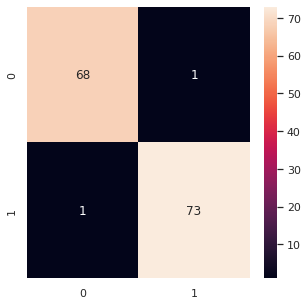

In [53]:
import pickle
filename = 'breastCancer_model6.2_et_SNROM.sav'
pickle.dump(etree_classifier, open(filename,'wb'))

#plotting confusion matrix
sns.set(rc={'figure.figsize':(5,5)})
cm = confusion_matrix(y_test,y_pred_et)
sns.heatmap(cm,annot=True,fmt="d")

#### **Scale, Outliers Remove and Resample**

In [42]:
y = data["diagnosis"]
X_scaled = scaler(X)
X_good3, y_good3 = remove_outliers(X_scaled, y, f=2, distance=2)
X_new5, y_new5 = resample(X_good3, y_good3, method="RandomOverSampler")

data point:  0 is considered outlier to more than  2  feature
data point:  3 is considered outlier to more than  2  feature
data point:  9 is considered outlier to more than  2  feature
data point:  12 is considered outlier to more than  2  feature
data point:  25 is considered outlier to more than  2  feature
data point:  38 is considered outlier to more than  2  feature
data point:  42 is considered outlier to more than  2  feature
data point:  68 is considered outlier to more than  2  feature
data point:  71 is considered outlier to more than  2  feature
data point:  78 is considered outlier to more than  2  feature
data point:  82 is considered outlier to more than  2  feature
data point:  108 is considered outlier to more than  2  feature
data point:  112 is considered outlier to more than  2  feature
data point:  122 is considered outlier to more than  2  feature
data point:  138 is considered outlier to more than  2  feature
data point:  146 is considered outlier to more than  2

In [43]:
labelencoder_Y = LabelEncoder()
y_new5 = labelencoder_Y.fit_transform(y_new5)

In [44]:
result12, X_test, y_test = tune_compare_clf(X_new5, y_new5, classifiers, parameters, classifiers_names)


Train size :  (552, 32)  and Train labels :  (552,) 

Test size:  (138, 32)  and Test labels :  (138,) 
 

  ----  Random Forest  ----  
F1-SCORE: 99.28%
ACCURACY: 99.28%
The best estimator across ALL searched params:  RandomForestClassifier(bootstrap=False, max_features=3)
The best score across ALL searched params:  0.9782637182637183
The best parameters across ALL searched params:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 96.38%
ACCURACY: 96.38%
The best estimator across ALL searched params:  ExtraTreesClassifier(min_samples_split=3, n_estimators=16)
The best score across ALL searched params:  0.9746273546273546
The best parameters across ALL searched params:  {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 16}




  ----  Decision Tree  ----  
F1-SCORE: 96.38%
ACCURACY: 96.38%
The best estimator across ALL searched params:  Decision

**As observed the Random Forest classifier gives the overall best accuracy and F1 score of 99.28% on the dataset scaled, outliers handled and resampled using the Naive Random Over-sampling method. It can also be observed that the scores of each classifier improved compared to other set of techniques.**

In [47]:
#re-fitting the best model i.e. and saving it
X_train, X_test, y_train, y_test = train_test_split(X_new5, y_new5, test_size=0.20, random_state=42)
rf_classifier2 = RandomForestClassifier(bootstrap=False, max_features=3)
rf_classifier2.fit(X_train, y_train)
y_pred_rf2 = rf_classifier2.predict(X_test)
accuracy_score(y_test, y_pred_rf2)


0.9927536231884058

<AxesSubplot:>

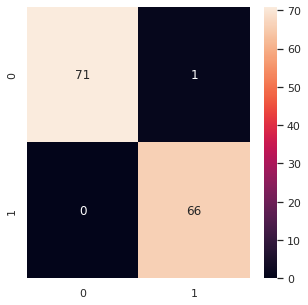

In [48]:
import pickle
filename = 'breastCancer_model7.2_rf_SONROM.sav'
pickle.dump(rf_classifier2, open(filename,'wb'))

#plotting confusion matrix
sns.set(rc={'figure.figsize':(5,5)})
cm = confusion_matrix(y_test,y_pred_rf2)
sns.heatmap(cm,annot=True,fmt="d")

#### **Feature Selection, Scale, Outlier Removal and Resampling**

In [69]:
y = data["diagnosis"]
X_selected3 = selector(X, y, 10)
X_scaled2 = scaler(X_selected3)
X_good4, y_good4 = remove_outliers(X_scaled2, y, f=2, distance=2)
X_new6, y_new6 = resample(X_good4, y_good4, method="RandomOverSampler")

data point:  82 is considered outlier to more than  2  feature
data point:  108 is considered outlier to more than  2  feature
data point:  122 is considered outlier to more than  2  feature
data point:  164 is considered outlier to more than  2  feature
data point:  180 is considered outlier to more than  2  feature
data point:  202 is considered outlier to more than  2  feature
data point:  210 is considered outlier to more than  2  feature
data point:  212 is considered outlier to more than  2  feature
data point:  236 is considered outlier to more than  2  feature
data point:  265 is considered outlier to more than  2  feature
data point:  272 is considered outlier to more than  2  feature
data point:  339 is considered outlier to more than  2  feature
data point:  352 is considered outlier to more than  2  feature
data point:  368 is considered outlier to more than  2  feature
data point:  369 is considered outlier to more than  2  feature
data point:  461 is considered outlier to

In [70]:
labelencoder_Y = LabelEncoder()
y_new6 = labelencoder_Y.fit_transform(y_new6)

In [71]:
result13, X_test, y_test = tune_compare_clf(X_new6, y_new6, classifiers, parameters, classifiers_names)


Train size :  (571, 10)  and Train labels :  (571,) 

Test size:  (143, 10)  and Test labels :  (143,) 
 

  ----  Random Forest  ----  
F1-SCORE: 93.01%
ACCURACY: 93.01%
The best estimator across ALL searched params:  RandomForestClassifier(criterion='entropy', max_features=3)
The best score across ALL searched params:  0.9526773455377574
The best parameters across ALL searched params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}




  ----  Extra DecisionTrees  ----  
F1-SCORE: 92.31%
ACCURACY: 92.31%
The best estimator across ALL searched params:  ExtraTreesClassifier(n_estimators=10)
The best score across ALL searched params:  0.9561861174675821
The best parameters across ALL searched params:  {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}




  ----  Decision Tree  ----  
F1-SCORE: 90.91%
ACCURACY: 90.91%
The best estimator across ALL searched params:  DecisionTreeClassifier(

**As observed the Random Forest classifier gives the overall best accuracy and F1 score of 93.01% on the dataset with 10 features selected, scaled, outliers handled and resampled using the Naive Random Over-sampling method.**

### Results when Indvidual Techniques were applied:
##### F1 Scores
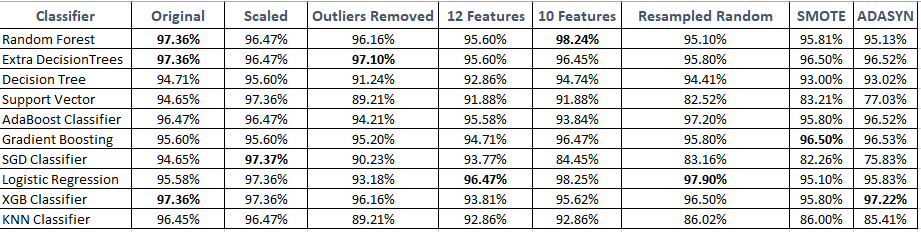


### Results when Set of Technniques were applied:
##### F1 Scores
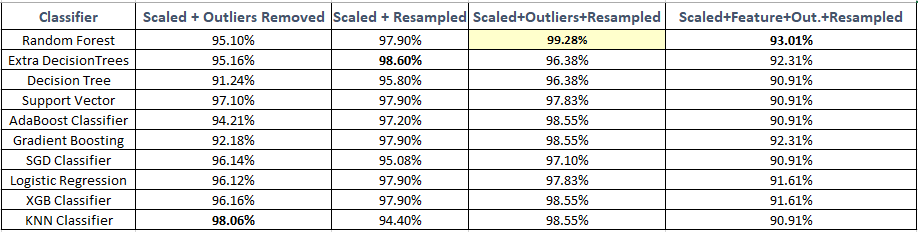

### Final Conclusion:
The highest and most consistent result across all classifiers was achieved on **Scaled, Outiliers Removed and Balanced data** using the Naive Random Over-sampling method. The highest score was achieved by **Random Forest Classifier** **(F1 Score = 99.28%)** and the lowest in that category was by the Decision Tree Classifier (F1 Score = 96.38%) which is still a really good F1 score.

<AxesSubplot:>

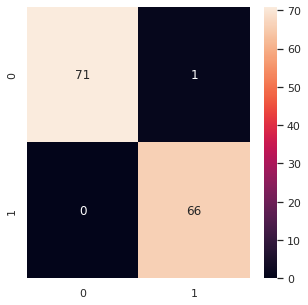

In [48]:
#plotting confusion matrix for the best result
sns.set(rc={'figure.figsize':(5,5)})
cm = confusion_matrix(y_test,y_pred_rf2)
sns.heatmap(cm,annot=True,fmt="d")

**Which Indicates that:**
* 71 data points was correctly predicted as Benign tumors
* 66 data points was correctly predicted as Malignant tumors
* 01 data point was wrongly predicted as Malignan tumor
* 00 data point was wrongly predictes as Benign tumor